<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Bankloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
data=pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


Nous voyons que nous n'observons aucune valeur manquante dans notre jeu de données..

In [6]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [7]:
data.isnull().nunique

<bound method DataFrame.nunique of          ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0     False  False       False   False     False   False  False      False   
1     False  False       False   False     False   False  False      False   
2     False  False       False   False     False   False  False      False   
3     False  False       False   False     False   False  False      False   
4     False  False       False   False     False   False  False      False   
...     ...    ...         ...     ...       ...     ...    ...        ...   
4995  False  False       False   False     False   False  False      False   
4996  False  False       False   False     False   False  False      False   
4997  False  False       False   False     False   False  False      False   
4998  False  False       False   False     False   False  False      False   
4999  False  False       False   False     False   False  False      False   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0        False          False               False       False   False   
1        False          False               False       False   False   
2        False          False               False       False   False   
3        False          False               False       False   False   
4        False          False               False       False   False   
...        ...            ...                 ...         ...     ...   
4995     False          False               False       False   False   
4996     False          False               False       False   False   
4997     False          False               False       False   False   
4998     False          False               False       False   False   
4999     False          False               False       False   False   

      CreditCard  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
4995       False  
4996       False  
4997       False  
4998       False  
4999       False  

[5000 rows x 14 columns]>

In [8]:
data.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2


Renommons nos features en français pour une meilleure compréhension..

In [9]:
data = data.rename(columns={
    'ID': 'ID',
    'Age': 'Âge',
    'Experience': 'Expérience',
    'Income': 'Revenu',
    'ZIP Code': 'Code Postal',
    'Family': 'Famille',
    'CCAvg': 'Moyenne Carte Crédit',
    'Education': 'Éducation',
    'Mortgage': 'Prêt Immobilier',
    'Personal Loan': 'Prêt Personnel',
    'Securities Account': 'Compte Titres',
    'CD Account': 'Compte à Terme',
    'Online': 'En Ligne',
    'CreditCard': 'Carte de Crédit'
})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5000 non-null   int64 
 1   Âge                   5000 non-null   int64 
 2   Expérience            5000 non-null   int64 
 3   Revenu                5000 non-null   int64 
 4   Code Postal           5000 non-null   int64 
 5   Famille               5000 non-null   int64 
 6   Moyenne Carte Crédit  5000 non-null   object
 7   Éducation             5000 non-null   int64 
 8   Prêt Immobilier       5000 non-null   int64 
 9   Prêt Personnel        5000 non-null   int64 
 10  Compte Titres         5000 non-null   int64 
 11  Compte à Terme        5000 non-null   int64 
 12  En Ligne              5000 non-null   int64 
 13  Carte de Crédit       5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [11]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r',
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary',
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare',
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20',
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Analyse Univarié

Analyse de la variable cible "Prêt personnel"

Prêt Personnel
0    4520
1     480
Name: count, dtype: int64


/tmp/ipython-input-296287432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prêt Personnel',data=data,palette = colors[value])


<Axes: xlabel='Prêt Personnel', ylabel='count'>

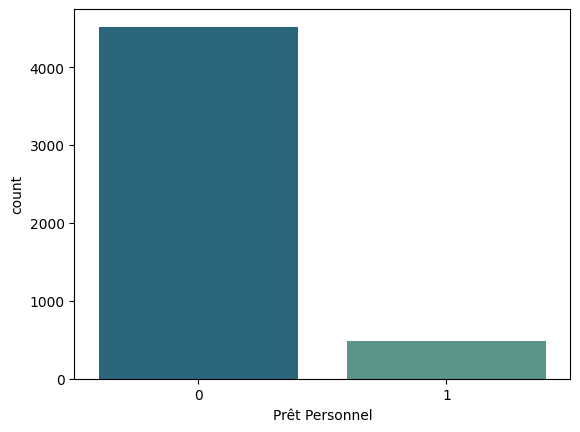

In [12]:
value = randint(0, len(colors)-1)
print(data['Prêt Personnel'].value_counts())
sns.countplot(x='Prêt Personnel',data=data,palette = colors[value])

Nous remarquons un déséquilibre flagrant au niveau de la variable cible "Prêt personnel". Nous devons veiller à ce que cela n'impacte pas le modèle de prédiction...

In [13]:
data.head()

,ID,Âge,Expérience,Revenu,Code Postal,Famille,Moyenne Carte Crédit,Éducation,Prêt Immobilier,Prêt Personnel,Compte Titres,Compte à Terme,En Ligne,Carte de Crédit
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


Séparons maintenant les variables de notre base de données..

In [14]:
cat_vars=["Famille","Éducation","Compte Titres","Compte à Terme","En Ligne","Carte de Crédit"]
num_vars=["Âge","Expérience","Revenu","Prêt Immobilier"]

Analyse des variables catégorielles.

Famille
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


/tmp/ipython-input-3878541403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Famille',data=data,palette = colors[value])


<Axes: xlabel='Famille', ylabel='count'>

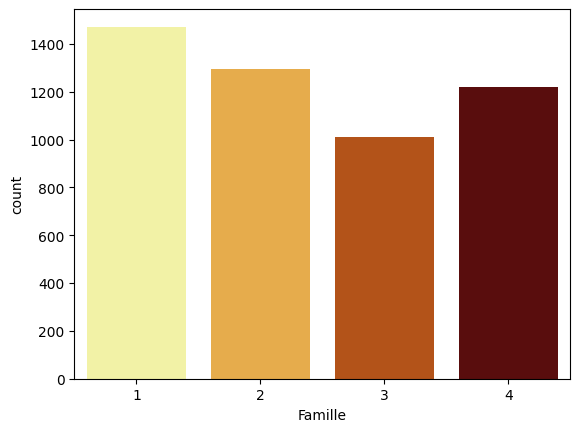

In [15]:
value = randint(0, len(colors)-1)
print(data['Famille'].value_counts())
sns.countplot(x='Famille',data=data,palette = colors[value])

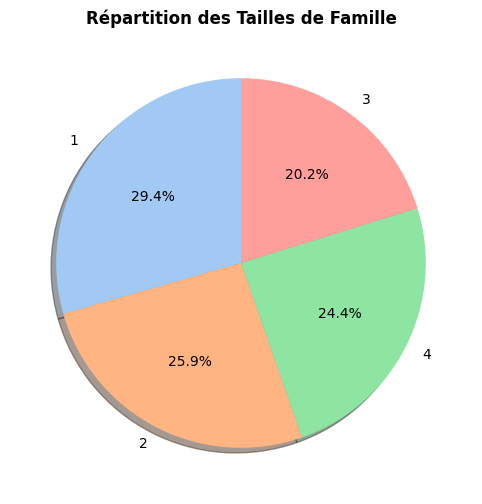

In [16]:
# Compter les valeurs de 'Famille'
famille_counts = data['Famille'].value_counts()
# Créer un pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    famille_counts,
    labels=famille_counts.index,
    autopct='%1.1f%%',  # Affiche les pourcentages
    startangle=90,       # Angle de départ
    colors=sns.color_palette('pastel'),  # Palette de couleurs douces
    shadow=True         # Ombre légère pour un effet 3D
)
plt.title('Répartition des Tailles de Famille', fontweight='bold')
plt.show()

Nous voyons à travers ces graphes que la majorité des clients de notre banque sont célibataires...😂

Éducation
1    2096
3    1501
2    1403
Name: count, dtype: int64


/tmp/ipython-input-1197898771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Éducation',data=data,palette = colors[value])


<Axes: xlabel='Éducation', ylabel='count'>

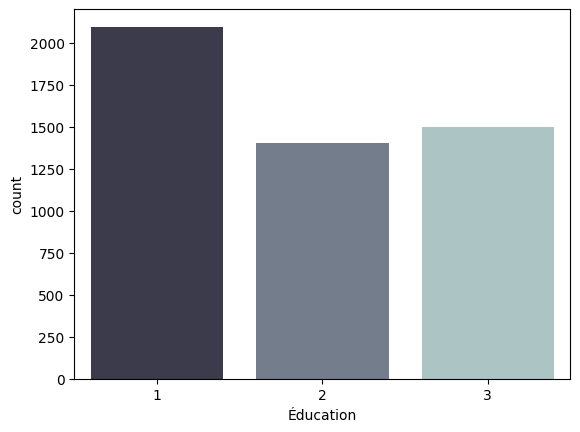

In [17]:
value = randint(0, len(colors)-1)
print(data['Éducation'].value_counts())
sns.countplot(x='Éducation',data=data,palette = colors[value])

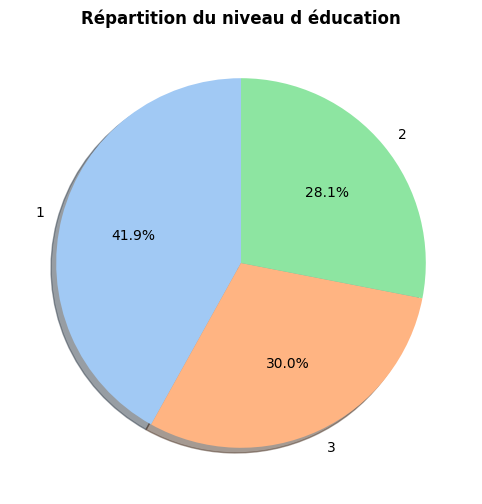

In [18]:
# Compter les valeurs de 'Famille'
education_counts = data['Éducation'].value_counts()
# Créer un pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',  # Affiche les pourcentages
    startangle=90,       # Angle de départ
    colors=sns.color_palette('pastel'),  # Palette de couleurs douces
    shadow=True         # Ombre légère pour un effet 3D
)
plt.title('Répartition du niveau d éducation', fontweight='bold')
plt.show()

Compte Titres
0    4478
1     522
Name: count, dtype: int64


/tmp/ipython-input-2202178922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Compte Titres',data=data,palette = colors[value])


<Axes: xlabel='Compte Titres', ylabel='count'>

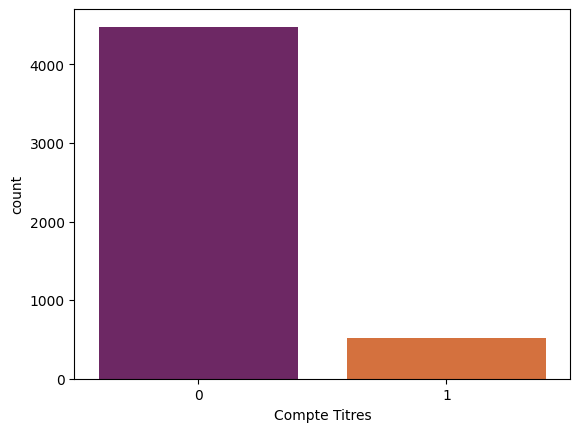

In [19]:
value = randint(0, len(colors)-1)
print(data['Compte Titres'].value_counts())
sns.countplot(x='Compte Titres',data=data,palette = colors[value])

Compte à Terme
0    4698
1     302
Name: count, dtype: int64


/tmp/ipython-input-224760012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Compte à Terme',data=data,palette = colors[value])


<Axes: xlabel='Compte à Terme', ylabel='count'>

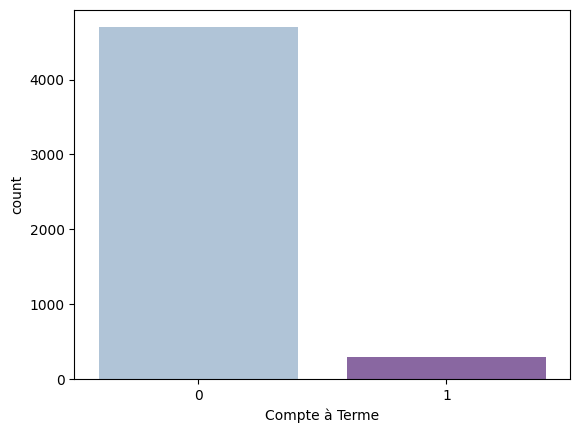

In [20]:
value = randint(0, len(colors)-1)
print(data['Compte à Terme'].value_counts())
sns.countplot(x='Compte à Terme',data=data,palette = colors[value])

En Ligne
1    2984
0    2016
Name: count, dtype: int64


/tmp/ipython-input-2043692200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='En Ligne',data=data,palette = colors[value])


<Axes: xlabel='En Ligne', ylabel='count'>

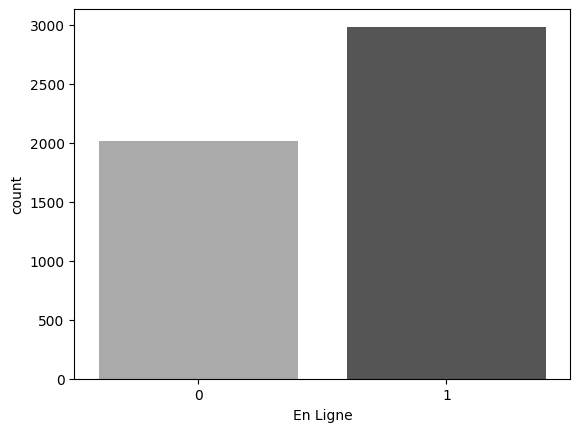

In [21]:
value = randint(0, len(colors)-1)
print(data['En Ligne'].value_counts())
sns.countplot(x='En Ligne',data=data,palette = colors[value])

Carte de Crédit
0    3530
1    1470
Name: count, dtype: int64


/tmp/ipython-input-2185313153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Carte de Crédit',data=data,palette = colors[value])


<Axes: xlabel='Carte de Crédit', ylabel='count'>

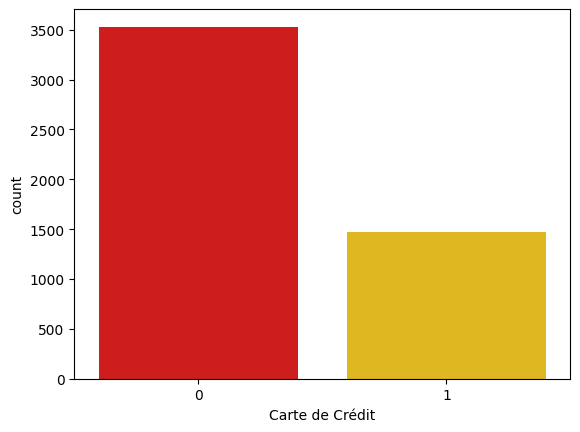

In [22]:
value = randint(0, len(colors)-1)
print(data['Carte de Crédit'].value_counts())
sns.countplot(x='Carte de Crédit',data=data,palette = colors[value])

Analyse des variables numériques

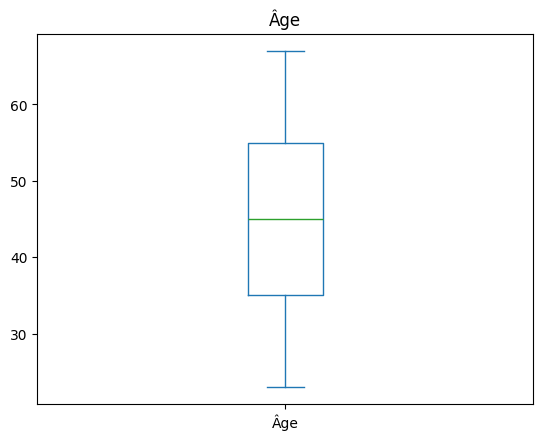

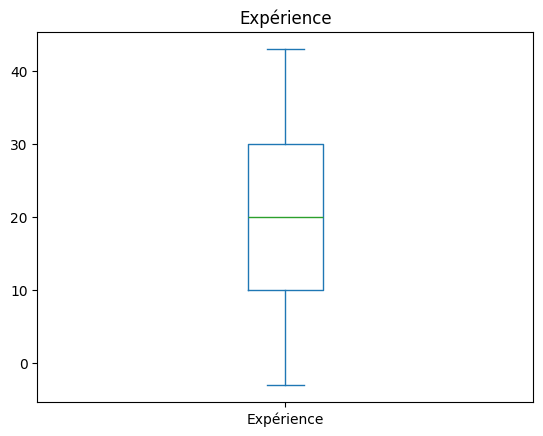

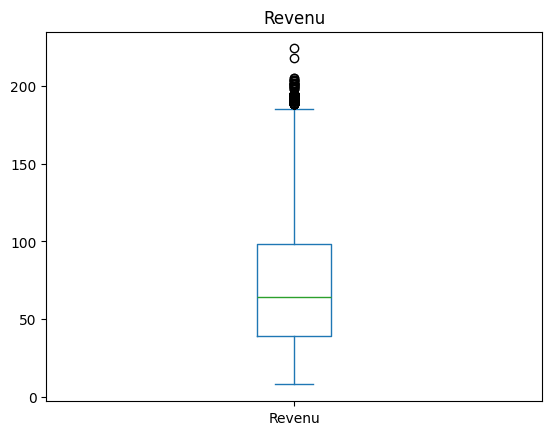

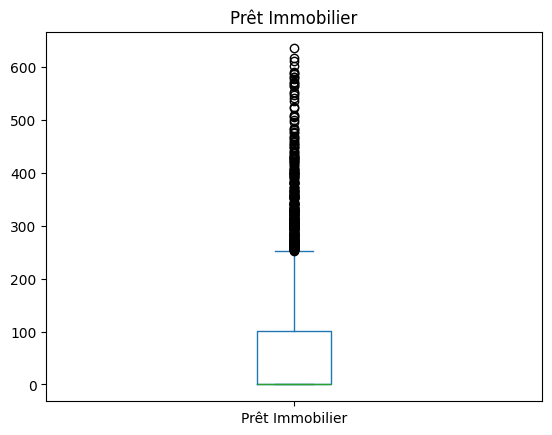

In [23]:
#Passons à l'analyse des variables numériques, nous allons utiliser les boxplots...
for var in num_vars:
     data[var].plot(kind='box')
     plt.title(var)
     plt.show()

In [24]:
data.describe()

,ID,Âge,Expérience,Revenu,Code Postal,Famille,Éducation,Prêt Immobilier,Prêt Personnel,Compte Titres,Compte à Terme,En Ligne,Carte de Crédit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Analyse Bi-variée

Famille  Prêt Personnel
1        0                 1365
2        0                 1190
4        0                 1088
3        0                  877
4        1                  134
3        1                  133
1        1                  107
2        1                  106
Name: count, dtype: int64


<Axes: xlabel='Famille', ylabel='count'>

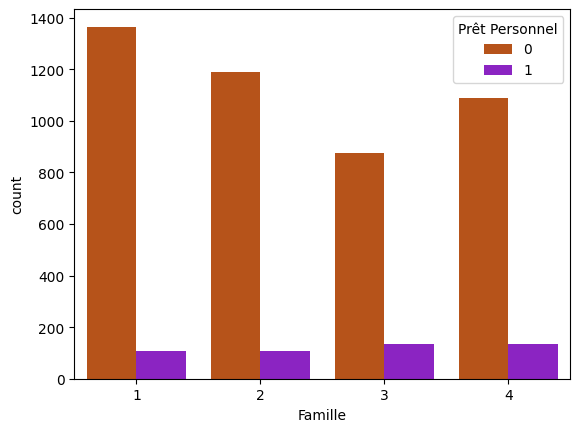

In [25]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
print(data[['Famille','Prêt Personnel']].value_counts())
sns.countplot(x='Famille',hue='Prêt Personnel',data = data,palette = colors[value])

<Axes: xlabel='Éducation', ylabel='count'>

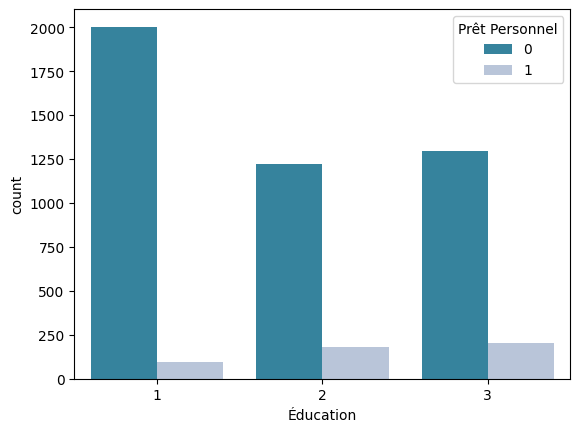

In [26]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Éducation',hue='Prêt Personnel',data = data,palette = colors[value])

<Axes: xlabel='Compte Titres', ylabel='count'>

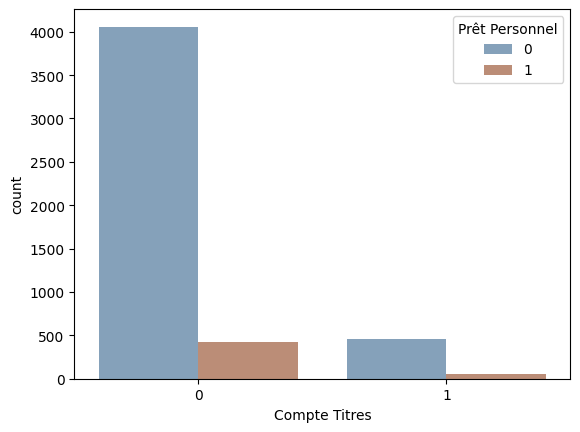

In [27]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Compte Titres',hue='Prêt Personnel',data = data,palette = colors[value])

<Axes: xlabel='Compte à Terme', ylabel='count'>

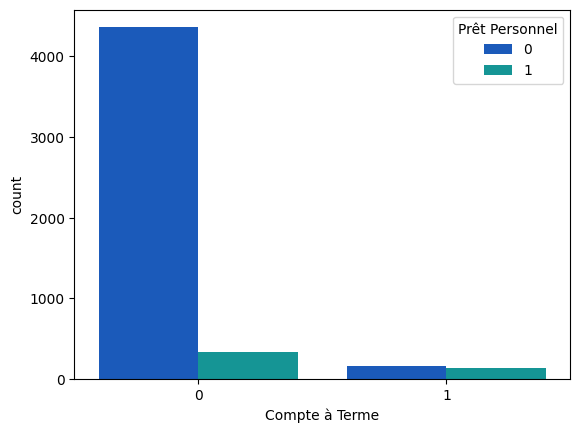

In [28]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Compte à Terme',hue='Prêt Personnel',data = data,palette = colors[value])

<Axes: xlabel='En Ligne', ylabel='count'>

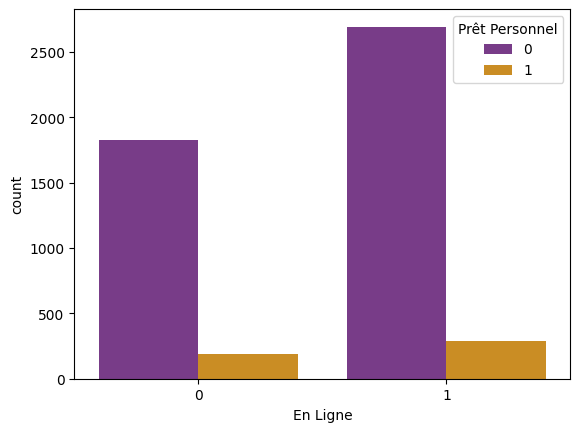

In [29]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='En Ligne',hue='Prêt Personnel',data = data,palette = colors[value])

In [30]:
cat_vars

['Famille',
 'Éducation',
 'Compte Titres',
 'Compte à Terme',
 'En Ligne',
 'Carte de Crédit']

<Axes: xlabel='Carte de Crédit', ylabel='count'>

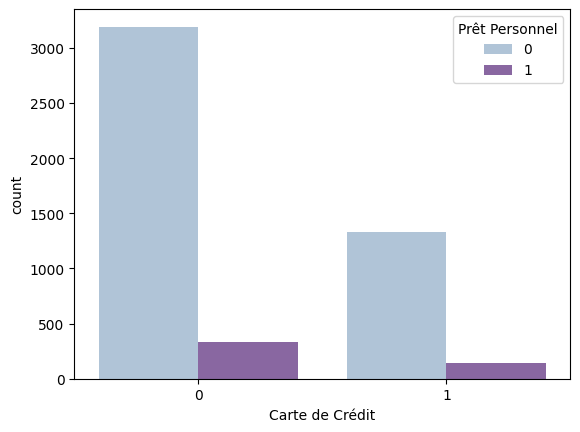

In [31]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Carte de Crédit',hue='Prêt Personnel',data = data,palette = colors[value])

In [32]:
from scipy.stats import chi2_contingency
#Initialize lists to store results
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

for var in cat_vars:
  contingency_table = pd.crosstab(data['Prêt Personnel'], data[var])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()  # total number of observations
  phi2 = chi2 / n  # phi-squared
  r, k = contingency_table.shape  # number of rows and columns
  # Bias correction (used when the table is not square or sample is small)
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rc = r - ((r-1)**2)/(n-1)
  kc = k - ((k-1)**2)/(n-1)
  cramer_v = np.sqrt(phi2corr / min(rc - 1, kc - 1))
  var_names.append(var)
  chi2_stats.append(chi2)
  p_values.append(p)
  cramer_vs.append(cramer_v)

results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})
results_df.sort_values(by='V de Cramer', inplace=True, ascending=False)
print(results_df)

          Variable        Chi2       P-valeur  V de Cramer
3   Compte à Terme  495.904242  7.398298e-110     0.314644
1        Éducation  111.239872   6.991474e-25     0.147825
0          Famille   29.676116   1.614412e-06     0.073049
2    Compte Titres    2.172311   1.405150e-01     0.015312
4         En Ligne    0.156007   6.928600e-01     0.000000
5  Carte de Crédit    0.021144   8.843861e-01     0.000000


D'après le Test du khi2, nous voyons que les variables catégorielles ayant une forte relation avec la variable cible sont **Compte à Terme, Education et Famille**

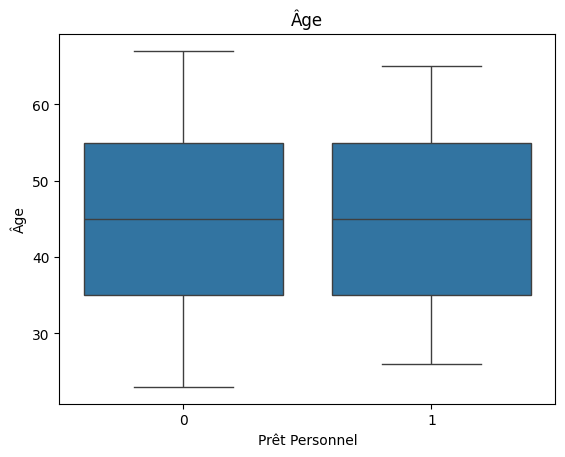

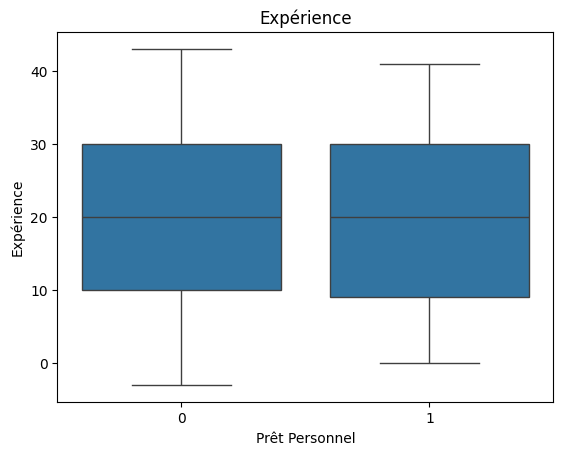

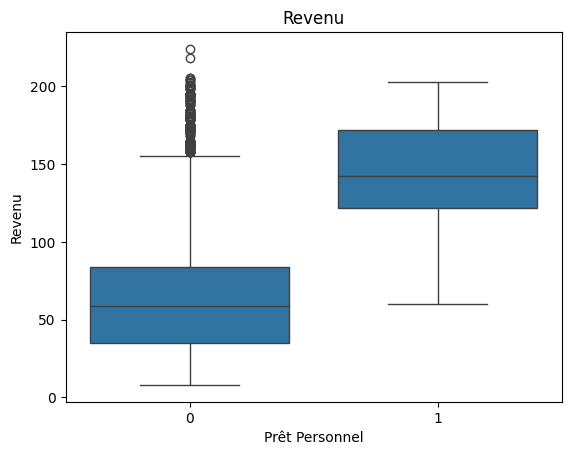

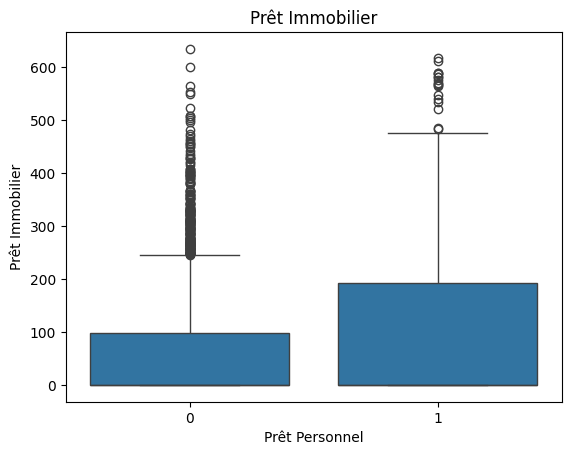

In [33]:
for var in num_vars:
    sns.boxplot(x='Prêt Personnel', y=var, data=data)
    plt.title(var)
    plt.xlabel('Prêt Personnel')
    plt.ylabel(var)
    plt.show()

In [34]:
import pandas as pd
import scipy.stats as stats

# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []
significatifs = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Créer deux groupes selon la variable cible (ici : binaire 0/1)
    group0 = data[data['Prêt Personnel'] == 0][var]
    group1 = data[data['Prêt Personnel'] == 1][var]

    # Appliquer le test de Kruskal-Wallis
    kw_stat, p_val = stats.kruskal(group0, group1)

    # Déterminer si la différence est significative
    est_significatif = "OUI" if p_val < 0.05 else "NON"

    # Stocker les résultats
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p_val)
    significatifs.append(est_significatif)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values,
    'Significatif': significatifs
})

# Trier les résultats par P-valeur croissante
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher les résultats
print(results_df)

          Variable  Kruskal-Wallis       P-valeur Significatif
2           Revenu      927.495199  1.034651e-203          OUI
3  Prêt Immobilier       20.026568   7.637366e-06          OUI
0              Âge        0.332168   5.643852e-01          NON
1       Expérience        0.312397   5.762132e-01          NON


D'après le test de Kruskal-Wallys,
Nous avons deux variables numériques significatifs à notre variable cible à savoir le Revenu et le Prêt Immobilier

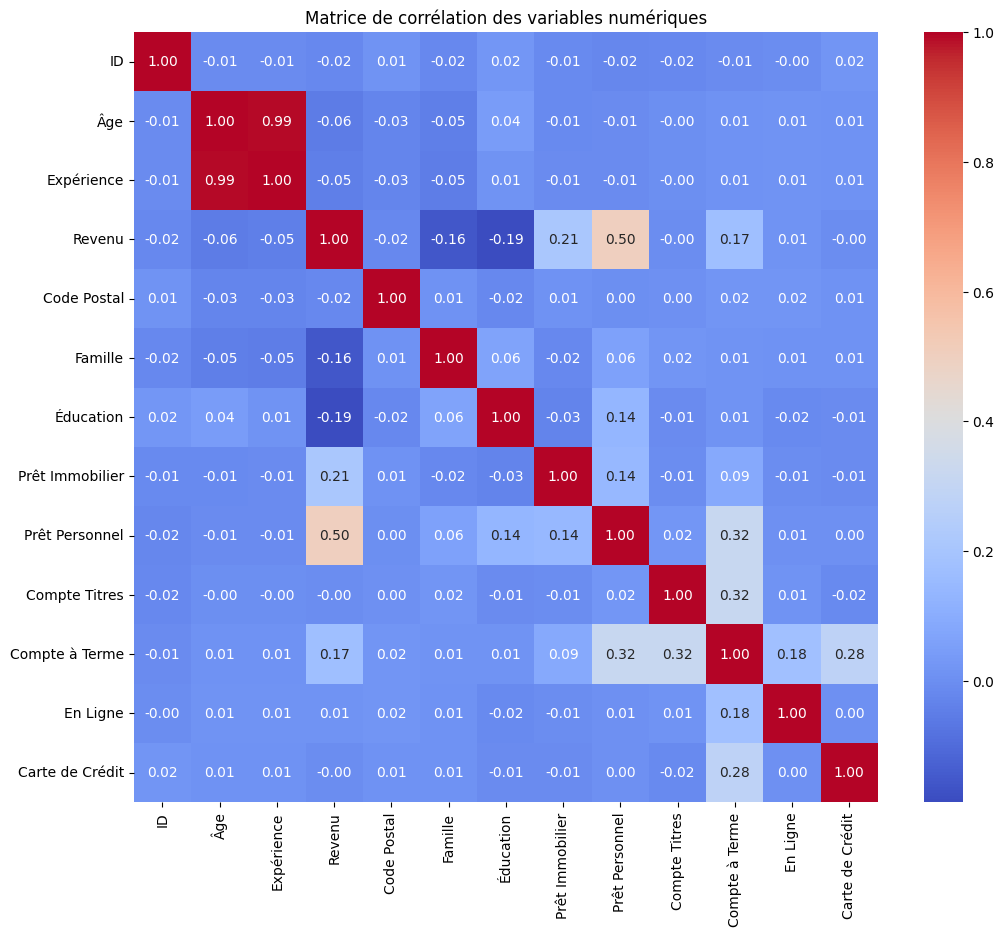

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer les colonnes numériques (en excluant les catégorielles)
num_data = data.select_dtypes(include=['int64', 'float64'])

# 2. Calculer la matrice de corrélation
corr = num_data.corr()

# 3. Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # fmt pour contrôler les décimales
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# Entrainement du modèle

Régression Logistique

Accuracy: 0.951

Matrice de confusion:
 [[883  12]
 [ 37  68]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.65      0.74       105

    accuracy                           0.95      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000



<Axes: >

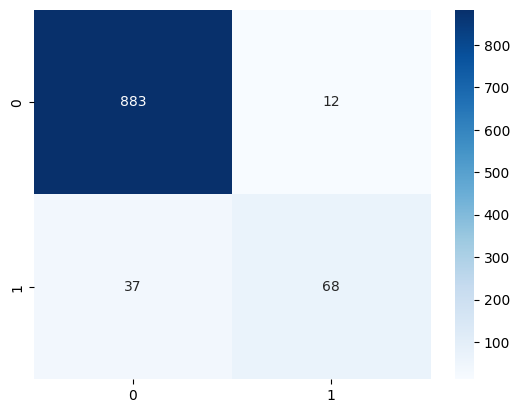

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
 # Si normalisation nécessaire

X = data.drop(columns=['ID', 'Prêt Personnel','Code Postal','Moyenne Carte Crédit'])  # Exclure la cible et les colonnes non pertinentes
y = data['Prêt Personnel']  # Variable cible

# drop_first=True pour éviter la colinéarité
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# test_size=0.2 : 20% des données en test
model = LogisticRegression(max_iter=1000)  # max_iter pour éviter les warnings
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Métriques principales
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Après entrainement, nous voyons que le modèle possède d'excellent résultats avec un accuracy de 0,951 et un f1-score assez bon pour les deux modalités de notre variable cible..
Essayons d'utiliser une méthode de sur-échantillonage pour équilibrer les classes...

Accuracy: 0.892

Matrice de confusion:
 [[796  99]
 [  9  96]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.49      0.91      0.64       105

    accuracy                           0.89      1000
   macro avg       0.74      0.90      0.79      1000
weighted avg       0.94      0.89      0.91      1000



<Axes: >

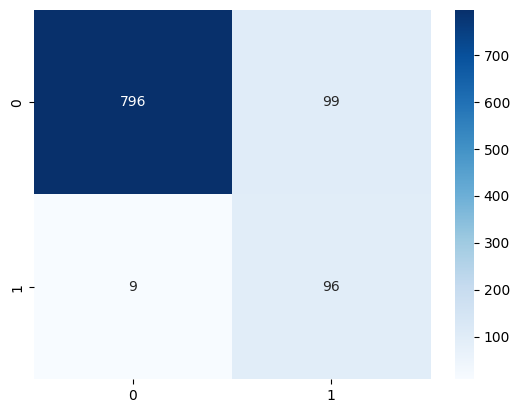

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model2 = LogisticRegression(max_iter=1000,random_state=42) # Increased iterations
model2.fit(X_train_resampled, y_train_resampled)

y_pred_2 = model2.predict(X_test)

# Métriques principales
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_2))
print("\nRapport de classification:\n", classification_report(y_test, y_pred_2))

cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')

La matrice de confusion nous montre que le taux d'erreur au niveau des clients recevant un avis favorable pour leur prêt..
Ce qui est une très bonne chose, toutefois nous voyons la marge d'erreur prendre une autre tournure au niveau de la classe opposée...
Essayons alors d'autres types de modèles ..

Arbre de décision DecisionTreeClassifier

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       895
           1       0.78      0.92      0.85       105

    accuracy                           0.96      1000
   macro avg       0.89      0.95      0.91      1000
weighted avg       0.97      0.96      0.97      1000



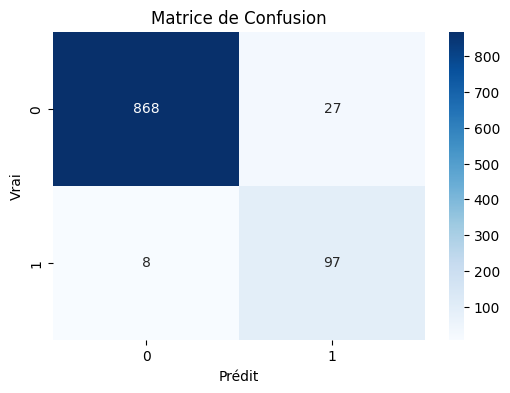

In [38]:
# Initialiser l'arbre de décision
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # Évite le sur-apprentissage
    min_samples_split=10  # Nombre min d'échantillons pour split
)

# Entraînement
dt_model.fit(X_train_resampled, y_train_resampled)

# Prédictions
y_pred = dt_model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Rapport détaillé
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

Nous voyons bien que la marge d'erreur pour la classe 0 a largement diminué. Par conséquent le modèle d'arbre de décision offre de meillleurs résultats que le modèle de Regression Logistique.

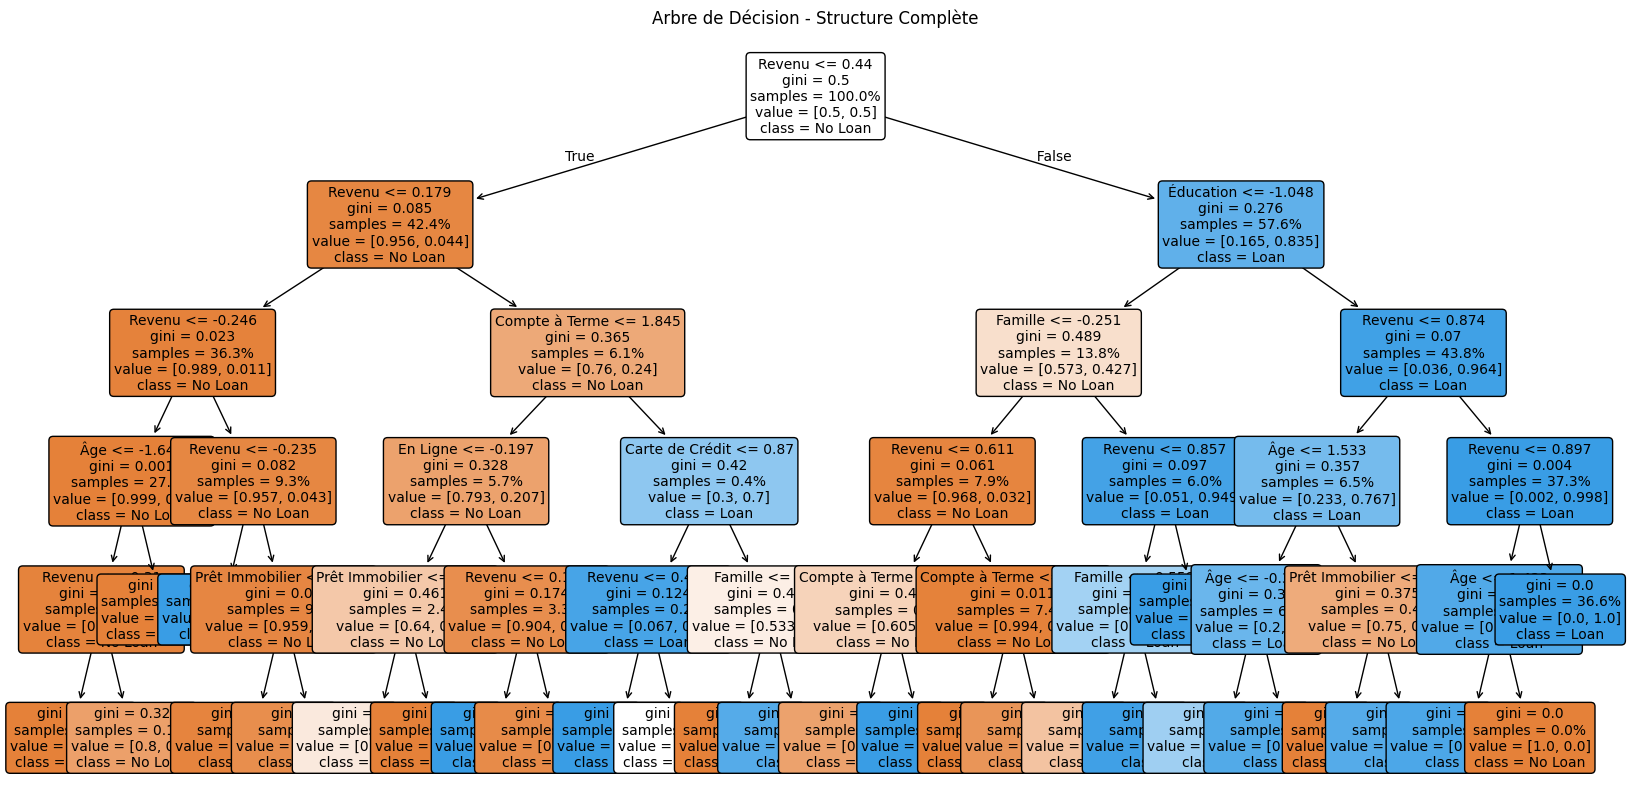

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Loan', 'Loan'],  # Adaptez selon vos classes
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)
plt.title("Arbre de Décision - Structure Complète")
plt.show()

Support Vector Classifier

Accuracy: 0.8890

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       895
           1       0.48      0.91      0.63       105

    accuracy                           0.89      1000
   macro avg       0.74      0.90      0.78      1000
weighted avg       0.94      0.89      0.90      1000



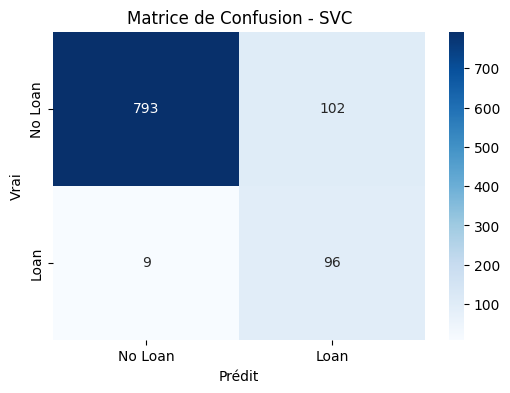

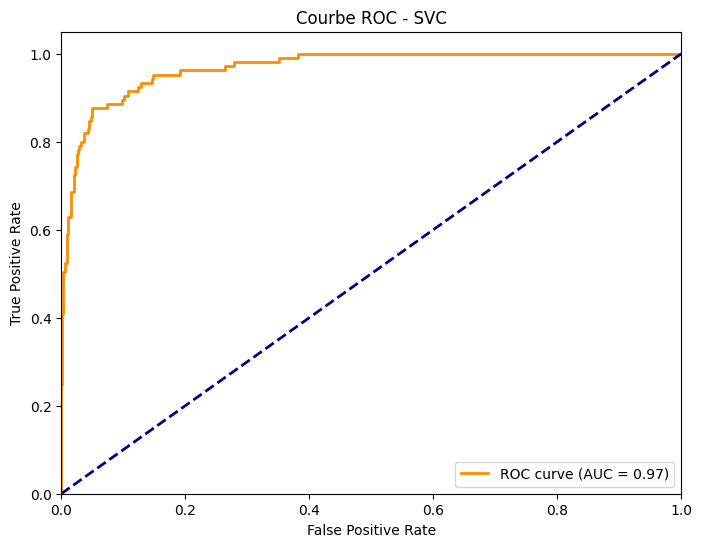

In [40]:
# Modèle SVC linéaire de base
svc_model = SVC(
    kernel='linear',
    random_state=42,
    probability=True  # Pour obtenir les probabilités
)

svc_model.fit(X_train_resampled, y_train_resampled)

# Prédictions
y_pred = svc_model.predict(X_test)
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]  # Probabilités classe 1

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Rapport détaillé
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan', 'Loan'],
            yticklabels=['No Loan', 'Loan'])
plt.title('Matrice de Confusion - SVC')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - SVC')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Définition des paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],           # Paramètre de régularisation
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux
    'gamma': ['scale', 'auto', 0.1, 1]    # Pour les noyaux rbf/poly
}

# Grid Search avec cross-validation
grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Utilise tous les processeurs
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score (CV):", grid_search.best_score_)

# Utilisation du meilleur modèle
best_svc = grid_search.best_estimator_

Meilleurs paramètres: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Meilleur score (CV): 0.9874482758620691


In [43]:
# Prédictions avec le meilleur modèle
y_pred_best = best_svc.predict(X_test)
y_pred_proba_best = best_svc.predict_proba(X_test)[:, 1]

print("Performance du modèle optimisé:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Performance du modèle optimisé:
Accuracy: 0.9540

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.67      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000

